# EDA on Sales of Used AUDI Cars (1997-2020)

# import required libraries and packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

#  import the data

In [75]:
df = pd.read_csv("audi.csv")

display(df.head(5))


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [76]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


# Here are the descriptions of the columns for the dataset

**Target variable:**

**Price:** selling price of the cars




**Features:**

**model:** list of the Audi cars

**Transmission:** transmission adapts the output of the internal combustion engine to the drive wheels

**Mileage:** The mileage of a vehicle is the number of miles that it can travel using one gallon or litre of fuel

**FuelType:** different fuels a vehicle may use

**Mpg:** miles per gallon the vehicle can travel

**EngineSize:** engineSize is the volume of fuel and air that can be pushed through a car's cylinders

**Year:** when the car was made

In [77]:
display(df.info())

# checking for missing value and data type

#year_count = df['year'].value_counts()
#display(year_count) #Count the number of unique values present in the 'year' column

#model_count = df['model'].value_counts()
#display(model_count) #Count the number of unique values present in the 'model' column



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


None

**Observations:** 

Number of observations (rows) = 10668

Number of columns = 8 (7 feature variables and 1 target variable)

Number of categorical variables = 3: model, transmission, fuelType

Number of numerical variables = 5: year, price, mileage, mpg, engineSize



**The dataset has no missing values**

In [78]:
transmission_count = df['transmission'].value_counts() # Count the number of unique values present in the 'transmission' column
display (transmission_count)


fuelType_count = df['fuelType'].value_counts() #Count the number of unique values present in the 'fuelType' column
display(fuelType_count) 

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [79]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


**Observations:**

* The oldest car in the dataset is from 1997
* The latest car is from 2020
* The average price of each used car is \$22896

* The most expensive car price is \$145000 and the cheapest car price is \\$1490
* The lowest mileage is 1 mile and highest mileage is 323000 miles
* The lowest mpg is 18.9 and highest mpg is 188.3
* Engine Size varies from 0 to 6

# Data Exploration using different types of plotting and graphs

# Find the percentage of unique values present in the 'fuelType' column

In [80]:
fuelType_count = df['fuelType'].value_counts()
print(type(fuelType_count)) # to know the data type of the variable

fuelType_count = pd.DataFrame(fuelType_count)
display(fuelType_count)


fuelType_count = fuelType_count.reset_index()
display(fuelType_count)

fuelType_count = fuelType_count.rename(columns={'index':'fuel_type', 'fuelType':'No_of_cars'})
display(fuelType_count)

print(fuelType_count['No_of_cars'].sum())

fuelType_count['% of cars'] = np.round(((fuelType_count['No_of_cars']/fuelType_count['No_of_cars'].sum())*100), 2)
display(fuelType_count)

<class 'pandas.core.series.Series'>


,fuelType
Diesel,5577
Petrol,5063
Hybrid,28


,index,fuelType
0,Diesel,5577
1,Petrol,5063
2,Hybrid,28


,fuel_type,No_of_cars
0,Diesel,5577
1,Petrol,5063
2,Hybrid,28


10668


,fuel_type,No_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


# Create a Bar plot for the fuelType columns

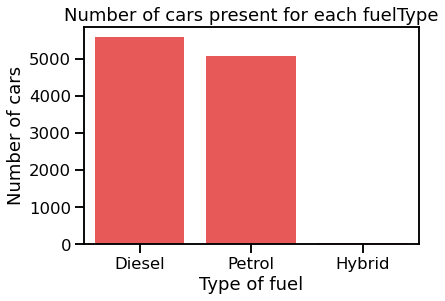

In [81]:
sns.barplot(x='fuel_type', y='No_of_cars', data=fuelType_count, color='red', alpha=0.75) #alpha=0.85 = opacity level 
plt.title("Number of cars present for each fuelType") #title for bar plot
plt.xlabel("Type of fuel") # to set the label for the x-axis
plt.ylabel("Number of cars") # to set the label for the y-axis
plt.show()


# Find the percentage of unique values present in the 'transmission' column

In [82]:

transmission_count = df['transmission'].value_counts()
#print(type(transmission_count))


transmission_count = pd.DataFrame(transmission_count)
#display(transmission_count)

transmission_count = transmission_count.reset_index()
#display(transmission_count)

transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'No_of_cars'})
display(transmission_count)

#print(transmission_count['No_of_cars'].sum())


transmission_count['% of cars'] = np.round(((transmission_count['No_of_cars']/transmission_count['No_of_cars'].sum())*100), 2)
display(transmission_count)

#print(type(transmission_count))

,transmission,No_of_cars
0,Manual,4369
1,Semi-Auto,3591
2,Automatic,2708


,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


# Create a Barplot for the 'transmission' column

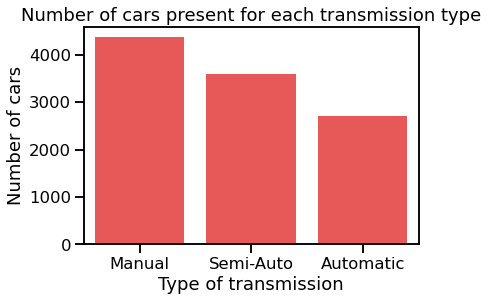

In [83]:
sns.barplot(x='transmission', y='No_of_cars', data=transmission_count, color='red', alpha=0.75) #alpha=0.85 = opacity level 
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")
plt.show()

#  Find the percentage of unique values present in the 'model' column

In [84]:
model_count = df['model'].value_counts()
#print(type(model_count))

model_count = pd.DataFrame(model_count)
#display(model_count)

model_count = model_count.reset_index()
#display(model_count)

model_count = model_count.rename(columns={'index':'model', 'model':'No_of_cars'})
#display(model_count)

#print(model_count['No_of_cars'].sum())

model_count['% of cars'] = np.round(((model_count['No_of_cars']/model_count['No_of_cars'].sum())*100), 2)
display(model_count)

,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27
5,Q5,877,8.22
6,Q2,822,7.71
7,A6,748,7.01
8,Q7,397,3.72
9,TT,336,3.15


# Create a Barplot for the 'model' column

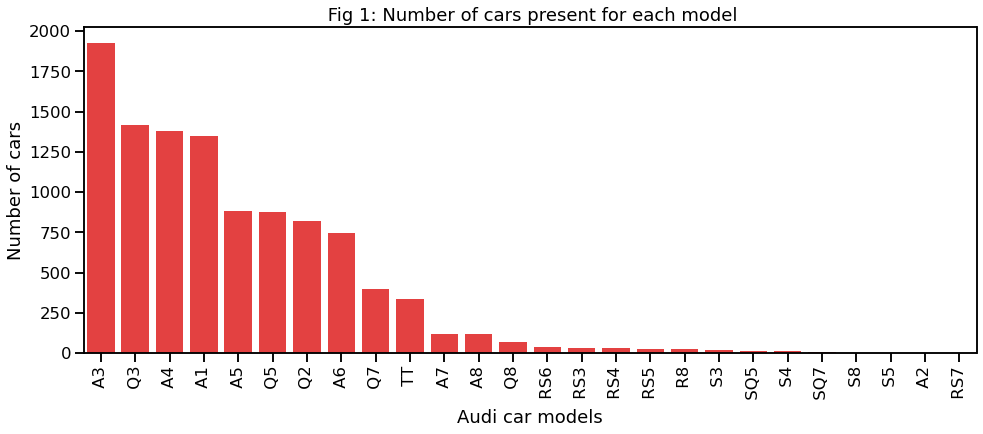

In [85]:
plt.figure(figsize=(16,6))

sns.barplot(x='model', y='No_of_cars', data=model_count, color='red', alpha=0.85)
#alpha=0.85 = opacity level 

plt.title(" Fig 1: Number of cars present for each model")


plt.xlabel("Audi car models") # to set the label for the x-axis
plt.ylabel("Number of cars") # to set the label for the y-axis
plt.xticks(rotation=90)

# plt.xticks(rotation=#) where # can be any angle by which we want to rotate the x labels


plt.show()

# create subplots for the columns

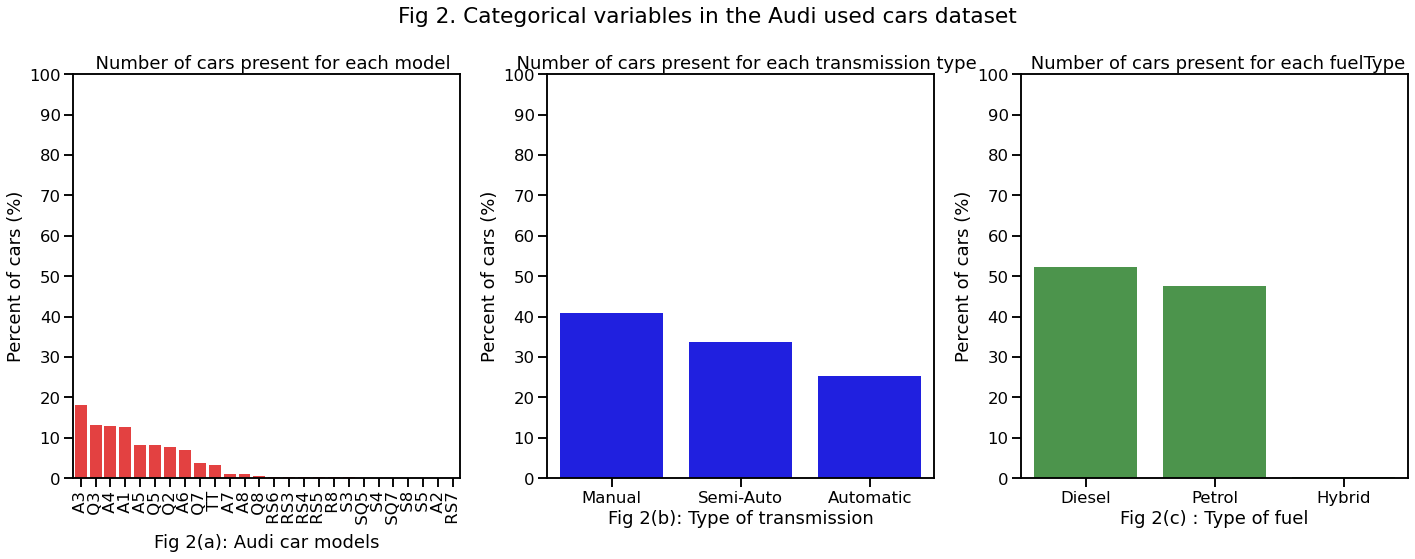

In [86]:
plt.figure(figsize=(20,8))
#setting the size of the graph. (Width, Length/Height)

# to create subplots means combine multiple graphs and show them together.
# To position them correctly,use rows and columns numbers based on the graphs placements on the figure
# (Number of rows, Number of column, position of the graph)
# In total,there will be 3 graphs in 1 rows and 3 columns.
plt.subplot(1,3,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='red', alpha=0.85)

##alpha=0.85 = opacity level

plt.title("  Number of cars present for each model")
plt.xlabel("Fig 2(a): Audi car models")
plt.ylabel("Percent of cars (%)")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,10).tolist())

#plt.yticks (np.arange (0, 101, step=10)) cover the range 0 to 101,will give a plot with 10 difference between each tick

#tolist (), used to convert the data elements of an array into a list

plt.subplot(1,3,2)
sns.barplot(x='transmission', y='% of cars', data=transmission_count, color='blue')
plt.title("  Number of cars present for each transmission type")
plt.xlabel("Fig 2(b): Type of transmission")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,101,10).tolist())

plt.subplot(1,3,3)
sns.barplot(x='fuel_type', y='% of cars', data=fuelType_count, color='green', alpha=0.75)
plt.title(" Number of cars present for each fuelType")
plt.xlabel("Fig 2(c) : Type of fuel")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,101,10).tolist())





plt.suptitle("Fig 2. Categorical variables in the Audi used cars dataset")

plt.tight_layout()
# tight_layout helps avoid overlapping of texts among graphs

plt.show()


**In Fig 2(a),shows the percentage distribution of used Audi cars based of the model.**

**Fig 2(b) shows the three variety of transmissions and the percentage of each found in Audi used cars and manual cars is higher than others in number**

**Fig 2(c) shows the percentage of used Audi cars with fuel types distributed among petrol, diesel, hybrid.Diesel is higher than petrol, hybrid dataset is not showing beacuse of less amount of data.**

#  Create a function to find the number of observations for unique value in a column of a DataFrame

In [87]:
def unique_val_count(data, column):
    
    #Count unique values in each column of the dataframe
    
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    #The round () function returns a floating point number that is a rounded version of the specified number
    #df_count[] = used to count the no. of null observations across the given axis.
    
    # 2 is for two digits after the decimal point in a float variable
    
    return df_count

In [88]:

# value_counts() method to easily count the unique occurences of values

model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [89]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
year_count

,year,No_of_cars,% of cars
19,1997,1,0.01
20,1998,1,0.01
18,2002,2,0.02
16,2003,6,0.06
17,2004,5,0.05
15,2005,7,0.07
14,2006,9,0.08
13,2007,16,0.15
12,2008,21,0.20
11,2009,23,0.22


# Create a function to show the number of observations for each unique value in a column using a barplot

In [90]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

# Creating Subplots to visualize categorical variables

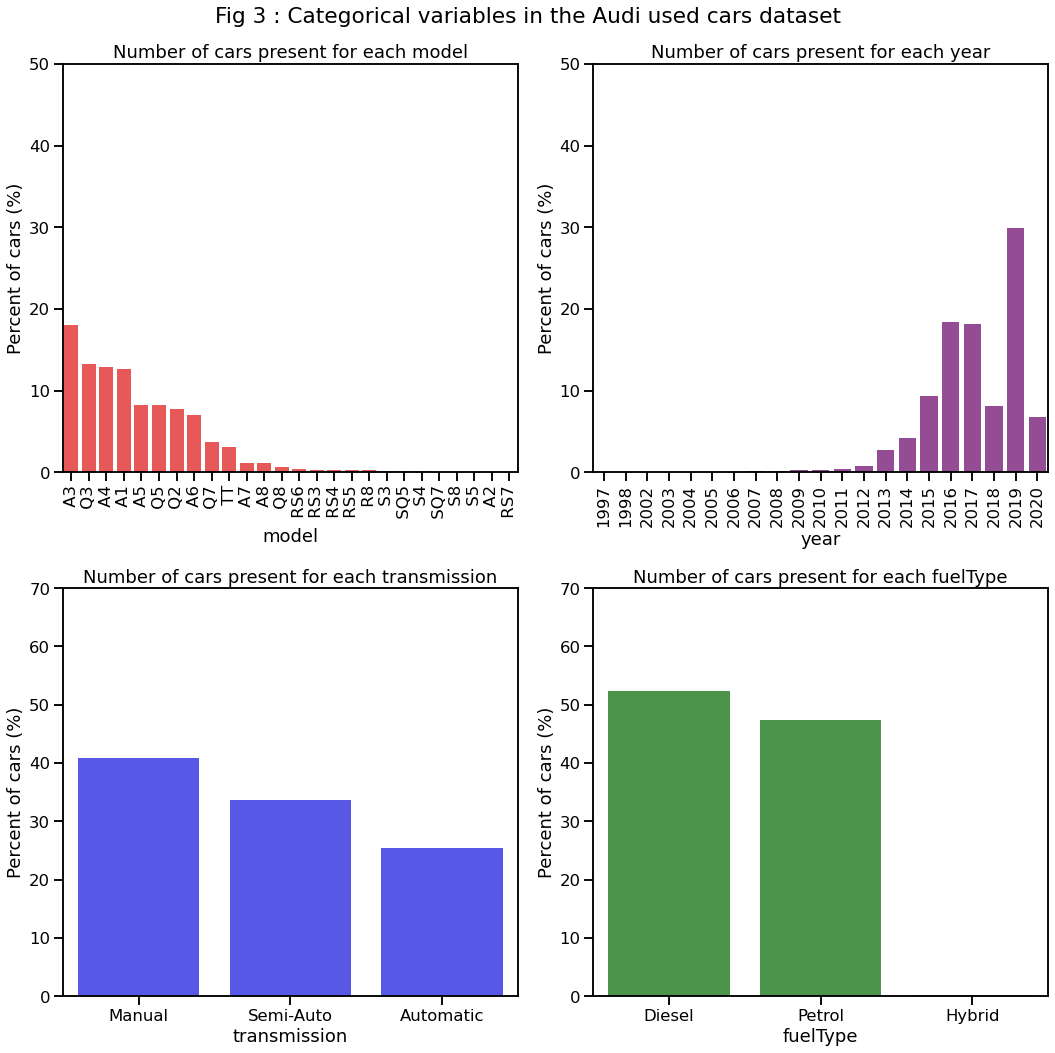

In [91]:
plt.figure(figsize=(15,15))
sns.set_context("talk")

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'red', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'purple', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'blue', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'green', 0, np.arange(0,71,10))

# write the title for all the plots
plt.suptitle("Fig 3 : Categorical variables in the Audi used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

* In Fig 3., first graph shows the percentage distribution of used Audi cars based of the model. 



* Second graph shows the percentage of used Audi cars per year, from 1997 to 2020.We can see approximately 29% cars released in the year 2019.



* Third graph shows the three variety of transmissions and the percentage of each found in Audi used cars. About 40% cars are manual, 34% cars are semiauto and 25% cars are automatic. Here, Maximum number of cars are manual and minimum number of cars are automatic.



* Fourth graph shows the percentage of used Audi cars with fuel types distributed among petrol, diesel, hybrid.About 52% cars fueltype is diesel and 48% cars fueltype is petrol.

#  Create scatterplot with the numeric columns,add a categorical column as hue

In [92]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


**there is 4 numeric columns : price, mileage, mpg, engine size**

**lets create a scatter plot for this numeric columns**

In [93]:
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


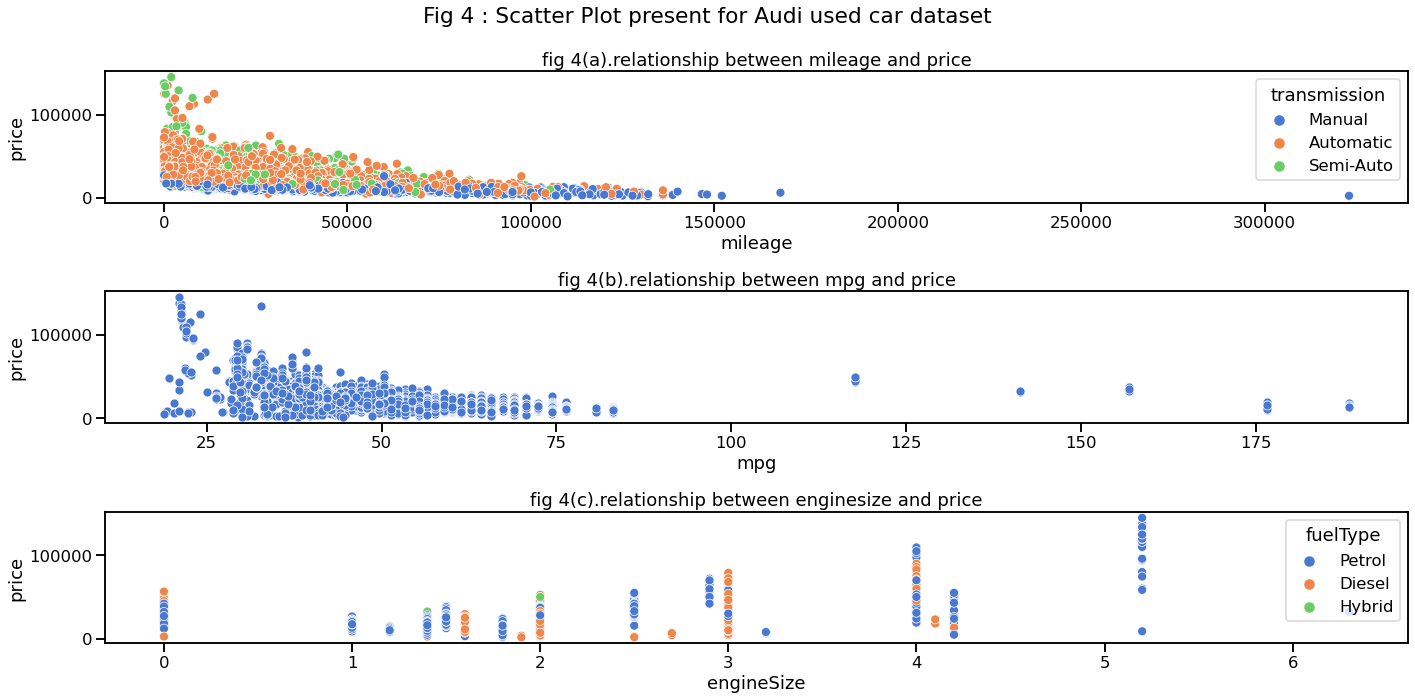

In [94]:
sns.set_context('talk')
sns.set_palette("muted")
plt.figure(figsize = (20,10))

plt.suptitle("Fig 4 : Scatter Plot present for Audi used car dataset")
plt.subplot(3,1,1)


#plt.subplot(3,1,1) = 3 row, 1 coulums, position = 1

sns.scatterplot(x='mileage',y ='price' ,data=df , hue='transmission')
plt.title ("fig 4(a).relationship between mileage and price")
#hue represents categorical columns

plt.subplot(3,1,2)

#plt.subplot(3,1,2) = 3 row, 1 coulums, position = 2

sns.scatterplot(x='mpg',y ='price' ,data=df)
plt.title ("fig 4(b).relationship between mpg and price")
plt.subplot(3,1,3)

#plt.subplot(3,1,3) = 3 row, 1 coulums, position = 3

sns.scatterplot(x='engineSize',y ='price' ,data=df , hue='fuelType')
plt.title ("fig 4(c).relationship between enginesize and price")
plt.tight_layout()

plt.show()


**Observations:** 

In figure 4 shows the relationship between numerical columns and price .

in fig 4 (a) there is a negative or inverse relationship between mileage and price and transmission add as hue parameter.showed us semi auto transmission cars price is higher than other. the manual cars price is less than 50000.


in fig 4 (b) shows also negative corelation between mpg and price if mpg is increasing ,price of cars is decreasing.


fig 4 (c) shows Cars with larger engines will usually eat up more fuel than smaller ones and large engine cost more money than smaller one

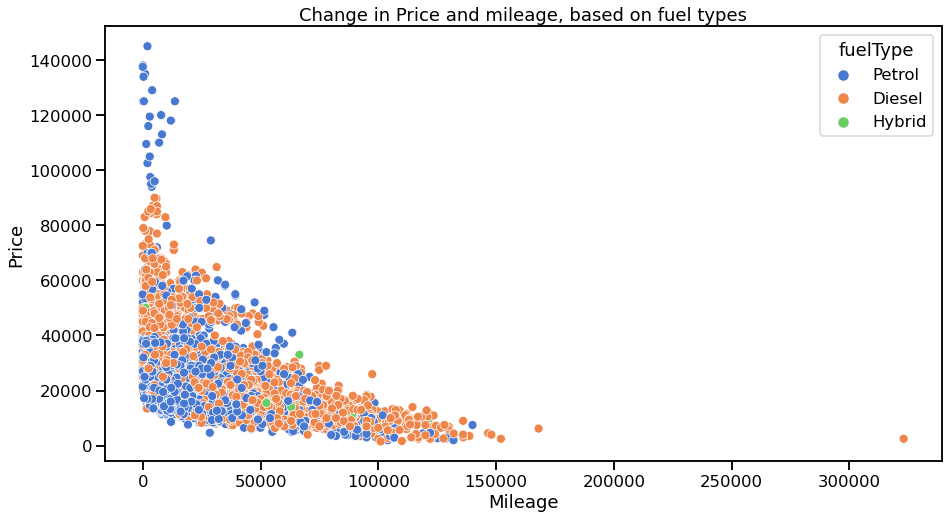

In [95]:
plt.figure(figsize=(15,8))

# hue is used to add categorical data into the analysis

sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')

plt.title("Change in Price and mileage, based on fuel types")
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.show()

 it can be noted that the correlation between price and mileage is consistent when fuel type of the cars are petrol and diesel. Also, the price of petrol cars shows to be higher than that of diesel cars. Hybrid is under-epresented in the figure due to their negligible number of observations in the dataset.

# Add a trend line

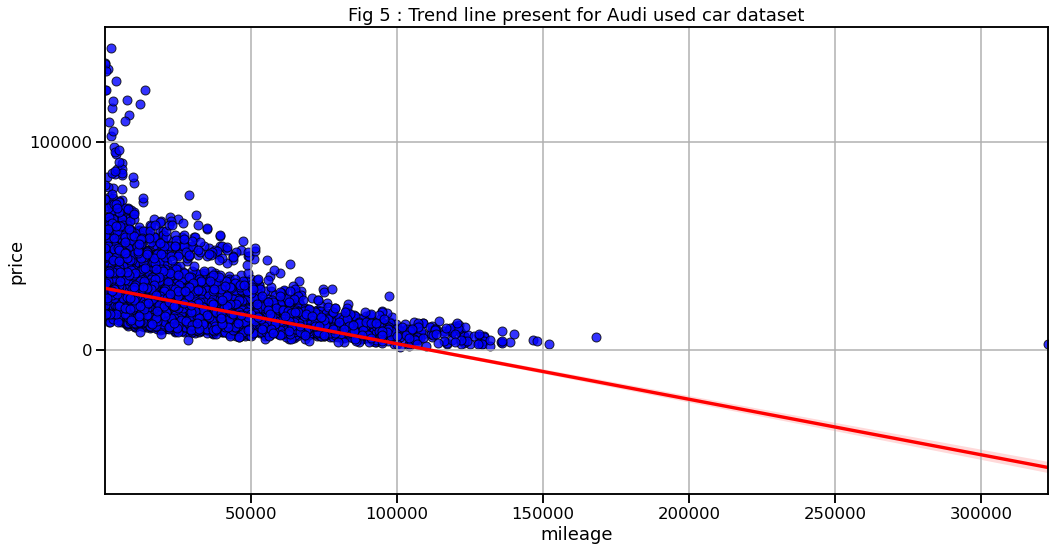

In [96]:

plt.figure(figsize = (15,8))

plt.title("Fig 5 : Trend line present for Audi used car dataset")
sns.regplot(x='mileage',y ='price' ,data=df , line_kws = {'color' :'red'},
            scatter_kws = {'color' :'blue', 'edgecolor' : 'black'})
# To see each data point clearly, we can change the edge color by using the dictionary scatter_kws.
plt.yticks(np.arange(0,150000,100000))

plt.grid()

plt.tight_layout()

plt.show()


**there is a negative or inverse relationship between mileage and price. The association between miles driven and price is negative, linear, and weak. this is also showed price changes with changes in mileage. The trend shows that as mileage increases, the price of the used Audi cars decreases. Provided that, the figure also represents that after going certain mileage, the used Audi cars hold no value.**

# create histogram using seaborn for the numerical columns

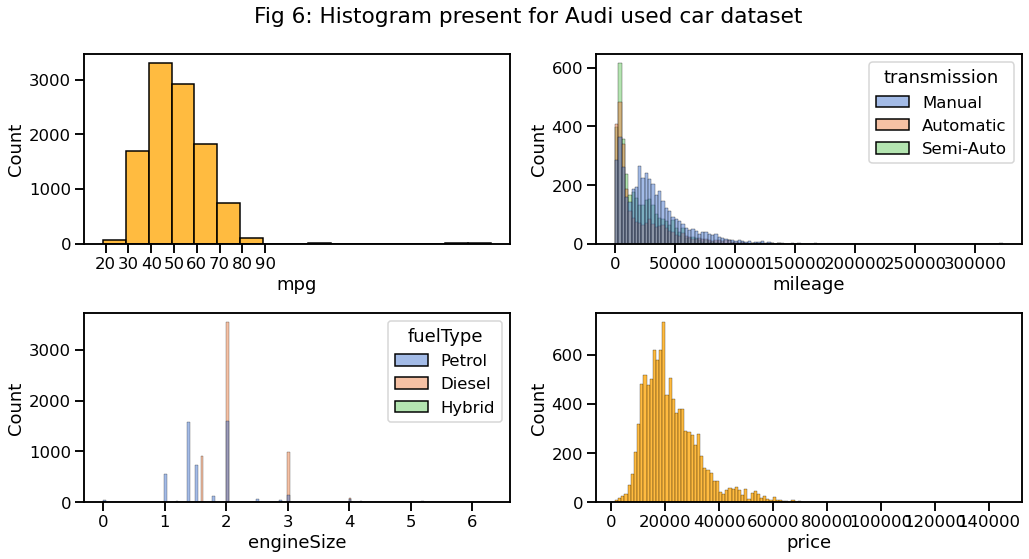

In [97]:
#pip install -U seaborn
sns.set_context('talk')
plt.figure(figsize = (15,8))


plt.suptitle("Fig 6: Histogram present for Audi used car dataset")

plt.subplot(2,2,1)
sns.histplot(data = df , x = 'mpg', binwidth=10 , color ='orange')
plt.xticks(np.arange(20,100,10))

plt.subplot(2,2,2)
sns.histplot(data = df , x = 'mileage' ,hue='transmission')


plt.subplot(2,2,3)
sns.histplot(data = df , x = 'engineSize', hue='fuelType')

plt.subplot(2,2,4)
sns.histplot(data = df , x = 'price', color ='orange')


plt.tight_layout()

plt.show()

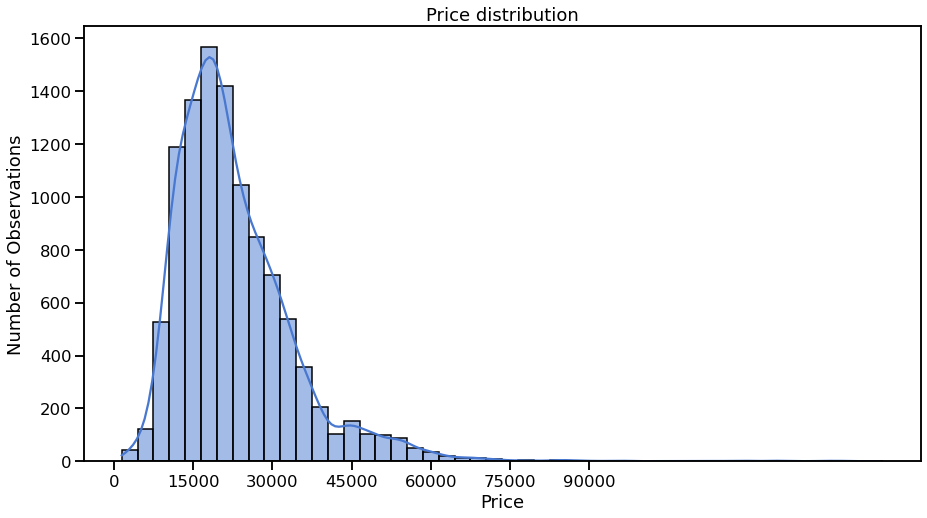

In [98]:
plt.figure(figsize=(15,8))

sns.histplot(data=df, x='price', binwidth=3000, kde=True)

plt.xticks(np.arange(0, 100000, 15000))

plt.xlabel("Price")
plt.ylabel("Number of Observations")
plt.title("Price distribution")

plt.show()

shows a unimodal distribution of price in the dataset with most of the used Audi cars sold for approximately $25,000.

# creating empirical cumulative distribution function for the numeric columns

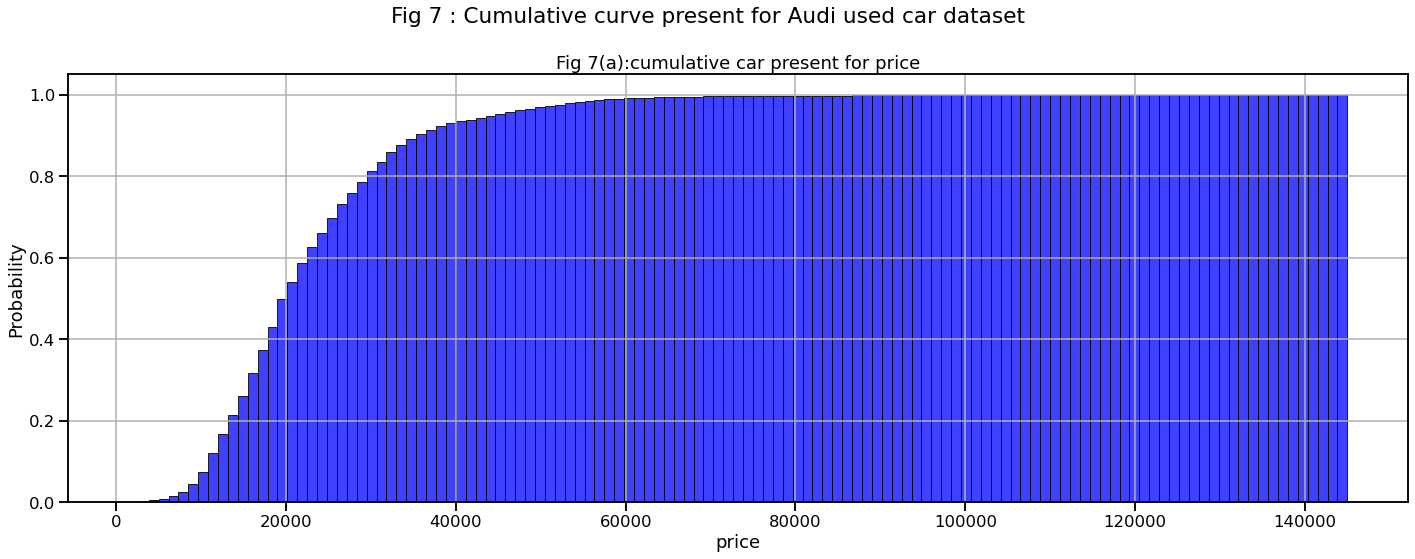

In [99]:
plt.figure(figsize = (20,8))


plt.suptitle("Fig 7 : Cumulative curve present for Audi used car dataset")



sns.histplot(data = df , x = 'price', color ='blue', cumulative =True, stat='probability' , alpha=0.75)
plt.title("Fig 7(a):cumulative car present for price")
plt.grid()
plt.tight_layout()

plt.show()

**Fig 7. represents the empiricial cumulative distribution price of used AUDI cars. The graphs shows us the probablity of occurence of price at a given point. For example, in fig 7(a) the probablity of the price being less than and equal $20000 is appriximately 0.5.**
 

# creating distributional plot for numerical columns

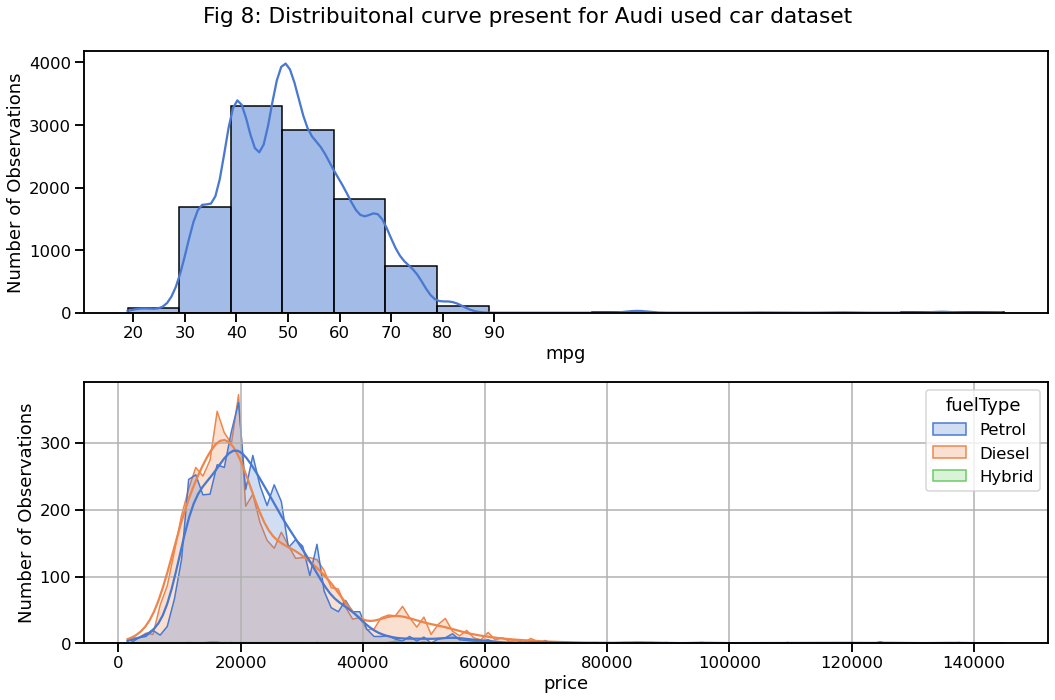

In [100]:
plt.figure(figsize = (15,10))


plt.suptitle("Fig 8: Distribuitonal curve present for Audi used car dataset")

plt.subplot(2,1,1)
sns.histplot(data = df , x = 'mpg', binwidth=10 , kde= True)
plt.xticks(np.arange(20,100,10))
plt.ylabel("Number of Observations")





plt.subplot(2,1,2)
sns.histplot(data = df , x = 'price', color ='orange', hue='fuelType' , kde = True ,element = 'poly')
plt.ylabel("Number of Observations")

plt.grid()

plt.tight_layout()

plt.show()

Fig 8. first graf shows the number of observation in terms of mpg  and we can understand that most of the used Audi cars miles per gallon the vehicle can travel was in 50. 
second graf shows the number of observations in-terms of price, based on different types of fuels. 

Only Petrol and Diesel type of fuel is observed in the histogram, this is because there are very few observations of Hybrid (28) types, corresponding to Petrol and Diesel.

Additionally, we can understand that most of the used Audi cars were sold for approximately $20,000.The graf also shows as the price ranges between 10000 and 30000 shows 50% of the observations.

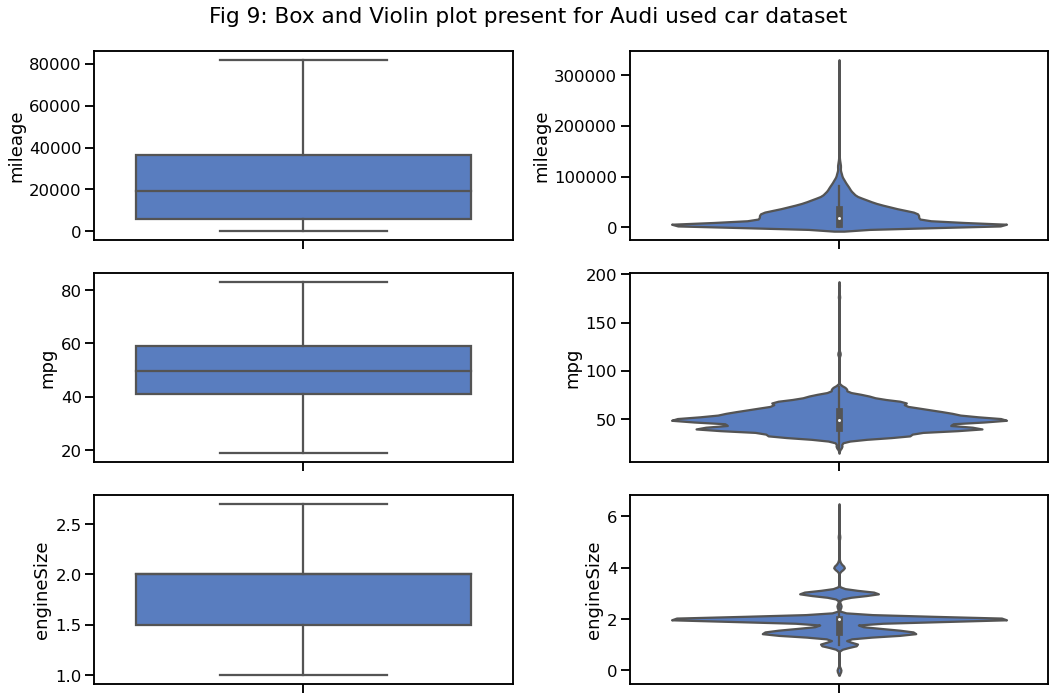

In [101]:
plt.figure(figsize = (15,10))
plt.suptitle("Fig 9: Box and Violin plot present for Audi used car dataset")
#color= "greyblue"
plt.subplot(3,2,1)
sns.boxplot(y=df["mileage"], showfliers=False)
plt.subplot(3,2,2)
sns.violinplot(y=df["mileage"], showfliers=False)


plt.subplot(3,2,3)
sns.boxplot(y=df["mpg"],  showfliers=False)
plt.subplot(3,2,4)
sns.violinplot(y=df["mpg"], showfliers=False)

plt.subplot(3,2,5)
sns.boxplot(y=df["engineSize"],showfliers=False)
plt.subplot(3,2,6)
sns.violinplot(y=df["engineSize"], showfliers=False)


plt.tight_layout()
#plt.show()

fig 9 presents us box plot and violin plot for Audi used car dataset

**for first two graf (mileage)**

 min = nearly zero
 
 first quartile (25th percentile) = around 5000
 
 median (50th percentile) = nearly 20000
 
 third quartile (75th percentile) = approximately 38000
 
 max = 80000
 
 range = max-min= 80000-0= 80000
 
 IQR (inter-quartile range) = third quartile - first quartile = 38000-5000= 33000
 
 
 
 **for second two graf (mpg)**
 
 min = 10
 
 first quartile (25th percentile) = 42
 
 median (50th percentile) = 50
 
 third quartile (75th percentile) = 58
 
 max = 85
 
 range = max-min= 85-10= 75
 
 IQR (inter-quartile range) = third quartile - first quartile = 58-42=16
 
 
 
 
**for third two graf (enginesize)**
 
 min = 1
 
 first quartile (25th percentile) = 1.5
 
 median (50th percentile) = 2
 
 third quartile (75th percentile) = 2.5
 
 max = 4
 
 range = max-min= 4-1=3
 
 IQR (inter-quartile range) = third quartile - first quartile = 2.5-1.5 =1
 
 
 
 

# Statistical summary of Price based on Transmission Types Using Box plot

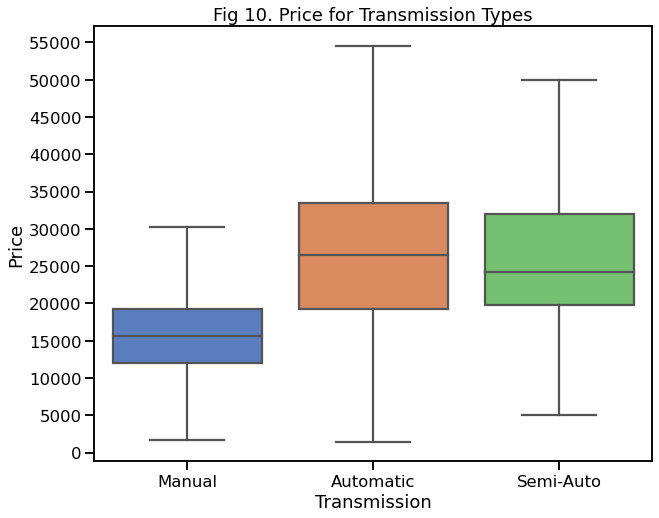

In [102]:
plt.figure(figsize=(10,8))

# creating boxplot using seaborn
sns.boxplot(x=df['transmission'], y=df['price'], showfliers=False)
# showfliers=False is used to exclude outliers

plt.yticks(np.arange(0, 60000, 5000))
plt.ylabel('Price')
plt.xlabel('Transmission')
plt.title('Fig 10. Price for Transmission Types')
plt.show()

shows the price of semi automatic cars although is the highest at the lowest observation, the price of automatic cars is more at highest observation. Even according to median value the price of automatic cars is observed to be higher at approximately $28,000.



So, it can be said that the price of automatic cars varies significantly with 50 %  of the observations between approximately $18,000  and $33,000